In [ ]:
#########################################################
# name: dataPreparation.ipynb
# Description: This program merges all the files and 
# prepares the data for model input
# Input Data : ./dataScienceTask
# Output Data: ./input
#########################################################

In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Read in all the datasets
df_creatinine = pd.read_csv("./dataScienceTask/T_creatinine.csv")
print("Creatinine", df_creatinine.shape)
# rename the value column
df_creatinine =  df_creatinine.rename({'value': 'vCreatinine'}, axis=1)

# read the diastolic blood pressure measurements
df_dbp = pd.read_csv("./dataScienceTask/T_DBP.csv")
print("dbp", df_dbp.shape)
# rename the value column
df_dbp =  df_dbp.rename({'value': 'vDBP'}, axis=1)

# read the glucose measurements
df_gluc = pd.read_csv("./dataScienceTask/T_glucose.csv")
print("Glucose", df_gluc.shape)
# rename the value column
df_gluc =  df_gluc.rename({'value': 'vGlucose'}, axis=1)

# read the hemoglobin measurements
df_hgb = pd.read_csv("./dataScienceTask/T_HGB.csv")
# rename the value column
df_hgb =  df_hgb.rename({'value': 'vHGB'}, axis=1)
# subset to consider only 2 years data
df_hgb = df_hgb
df_hgb =  df_hgb[df_hgb.time <=699]
# Print the shape
print("hgb", df_hgb.shape)
# read the Low-density lipoprotein measurements
df_ldl = pd.read_csv("./dataScienceTask/T_ldl.csv")
print("ldl", df_ldl.shape)
# rename the value column
df_ldl =  df_ldl.rename({'value': 'vLDL'}, axis=1)

# read the Systolic blood pressure measurements
df_sbp = pd.read_csv("./dataScienceTask/T_SBP.csv")
print("sbp", df_sbp.shape)
# rename the value column
df_sbp =  df_sbp.rename({'value': 'vSBP'}, axis=1)


Creatinine (1439, 3)
dbp (1821, 3)
Glucose (1556, 3)
hgb (1129, 3)
ldl (1261, 3)
sbp (1809, 3)


In [49]:
# Read medication data and patients data
df_demo = pd.read_csv("./dataScienceTask/T_demo.csv")
df_meds = pd.read_csv("./dataScienceTask/T_meds.csv")
df_stage = pd.read_csv("./dataScienceTask/T_stage.csv")

In [5]:
## Merging all the dataframes

merge1 = pd.merge(df_creatinine, df_dbp, how='outer', on=['id', 'time'])
merge2 = pd.merge(merge1, df_gluc, how = 'outer', on = ['id', 'time'])
merge3 = pd.merge(merge2, df_hgb, how = 'outer', on = ['id', 'time'])
merge4 = pd.merge(merge3, df_ldl, how = 'outer', on = ['id', 'time'])
merge5 = pd.merge(merge4, df_sbp, how = 'outer', on = ['id', 'time'])

In [34]:
# create a duplicate to check for the number dimension of data.

merge5_dup = merge5.fillna(0)
num_obs = merge5_dup.groupby(['id']).agg(['count'])
num_obs.describe()

,vCreatinine,time,vDBP,vGlucose,vHGB,vLDL,vSBP
,count,count,count,count,count,count,count
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,12.883333,12.883333,12.883333,12.883333,12.883333,12.883333,12.883333
std,4.042796,4.042796,4.042796,4.042796,4.042796,4.042796,4.042796
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
50%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
75%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
max,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000


In [40]:
num_obs.iloc[:,1]

id
0      12
1      15
2      10
3      15
4      16
       ..
295    19
296    13
297    18
298    17
299    12
Name: (time, count), Length: 300, dtype: int64

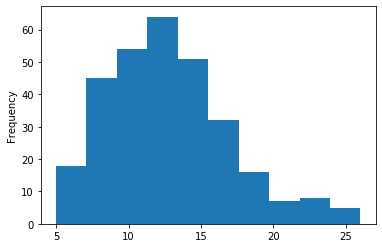

In [41]:
num_obs.iloc[:,1].plot(kind='hist')

In [70]:
# Create the medicine dosage columns
merge6 = pd.merge(merge5[['id', 'time']], df_meds, how = 'left', on =['id'])

In [71]:
## Add empty columns for each medicine with NaN for no dosage as default
merge6 = merge6.join(pd.DataFrame(
   0, 
    index=merge6.index, 
    columns= df_meds.drug.unique() + "_dose"
))

In [72]:
# Iterate through each row and add the corresponding dosage if the time value is in between the start and end date.
for index, row in merge6.iterrows():
    if (row['start_day'] <= row['time']) & ( row['time'] <= row['end_day']):
        #
        col_name = row['drug'] + '_dose'
        merge6[col_name][index] = row['daily_dosage']

C:\Users\sindh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
## Keep only the columns created 
keep_cols = ['time', 'id', 'atorvastatin_dose', 'losartan_dose', 'metformin_dose',
       'rosuvastatin_dose', 'pravastatin_dose', 'carvedilol_dose',
       'valsartan_dose', 'metoprolol_dose', 'simvastatin_dose',
       'bisoprolol_dose', 'atenolol_dose', 'lovastatin_dose',
       'olmesartan_dose', 'irbesartan_dose', 'canagliflozin_dose',
       'dapagliflozin_dose', 'telmisartan_dose', 'labetalol_dose',
       'nebivolol_dose', 'pitavastatin_dose', 'propranolol_dose']

In [74]:
merge6 = merge6[keep_cols].drop_duplicates()

In [79]:
# aggregate at ID and time level
merge6_cleaned = merge6.groupby(['id','time']).agg(['sum'])

merge6_cleaned.columns = df_meds.drug.unique() + "_dose"
merge6_cleaned = merge6_cleaned.reset_index()

In [87]:
# convert categorical variables to numeric 
df_demo = pd.get_dummies(df_demo, columns=['race', 'gender'])
#df_patientInfo = pd.merge( df_demo, df_stage, how = 'left', on = ['id'])

In [90]:

# merge all the data
int_data = pd.merge(merge5, merge6_cleaned, how = "left", on = ['id', 'time'])
final_data = pd.merge(int_data, df_demo, how = "left", on = ['id'])

In [93]:
## As a padding value replace all NaN with a value that is not common to occur in the data. -99 
final_data = final_data.fillna(-99)

In [ ]:
## Plot a correlation plot